In [ ]:
!pip install pycaret shap boto3 botocore explainerdashboard Autoviz

In [ ]:
# import mlflow
# import os
# from getpass import getpass

# os.environ['MLFLOW_TRACKING_USERNAME'] = input('Enter your DAGsHub username: ')
# os.environ['MLFLOW_TRACKING_PASSWORD'] = getpass('Enter your DAGsHub access token: ')
# os.environ['MLFLOW_TRACKING_PROJECTNAME'] = input('Enter your DAGsHub project name: ')

# mlflow.set_tracking_uri(f'https://dagshub.com/' + os.environ['MLFLOW_TRACKING_USERNAME'] 
#                         + '/' + os.environ['MLFLOW_TRACKING_PROJECTNAME'] + '.mlflow')

In [ ]:
import pandas as pd
df=pd.read_csv("data_done.csv")

In [ ]:
df.columns

Index(['Unnamed: 0', 'genero', 'monto', 'fecha', 'hora', 'tipo_tc', 'linea_tc',
       'interes_tc', 'status_txn', 'is_prime', 'dcto', 'cashback', 'fraude',
       'device_score', 'dia'],
      dtype='object')

In [ ]:
df.drop(['fecha'],axis=1 , inplace=True)

In [ ]:
df = df.iloc[: , 1:]


In [ ]:
#training_data = df.sample(frac=0.7, random_state=25)
#testing_data = df.drop(training_data.index)

In [ ]:
#print(f"No. of training examples: {training_data.shape[0]}")
#print(f"No. of testing examples: {testing_data.shape[0]}")

In [ ]:
from pycaret.clustering import *

s = setup(df, normalize = True)

Description                 Value
0                               session_id                  8599
1                            Original Data           (26975, 13)
2                           Missing Values                 False
3                         Numeric Features                     6
4                     Categorical Features                     7
5                         Ordinal Features                 False
6                High Cardinality Features                 False
7                  High Cardinality Method                  None
8                         Transformed Data           (26975, 30)
9                                 CPU Jobs                    -1
10                                 Use GPU                 False
11                          Log Experiment                 False
12                         Experiment Name  cluster-default-name
13                                     USI                  5b63
14                         Imputation Type                simple
15          Iterative Imputation Iteration                  None
16                         Numeric Imputer                  mean
17      Iterative Imputation Numeric Model                  None
18                     Categorical Imputer                  mode
19  Iterative Imputation Categorical Model                  None
20           Unknown Categoricals Handling        least_frequent
21                               Normalize                  True
22                        Normalize Method                zscore
23                          Transformation                 False
24                   Transformation Method                  None
25                                     PCA                 False
26                              PCA Method                  None
27                          PCA Components                  None
28                     Ignore Low Variance                 False
29                     Combine Rare Levels                 False
30                    Rare Level Threshold                  None
31                         Numeric Binning                 False
32                         Remove Outliers                 False
33                      Outliers Threshold                  None
34                Remove Multicollinearity                 False
35             Multicollinearity Threshold                  None
36             Remove Perfect Collinearity                 False
37                              Clustering                 False
38                    Clustering Iteration                  None
39                     Polynomial Features                 False
40                       Polynomial Degree                  None
41                    Trignometry Features                 False
42                    Polynomial Threshold                  None
43                          Group Features                 False
44                       Feature Selection                 False
45                Feature Selection Method               classic
46            Features Selection Threshold                  None
47                     Feature Interaction                 False
48                           Feature Ratio                 False
49                   Interaction Threshold                  None

In [ ]:
kmeans = create_model('kmeans', num_clusters= 5)

Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.0984          2847.8096          2.4726            0           0   

   Completeness  
0             0

In [ ]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=8599, tol=0.0001, verbose=0)


In [ ]:
plot_model(kmeans, plot = 'cluster')

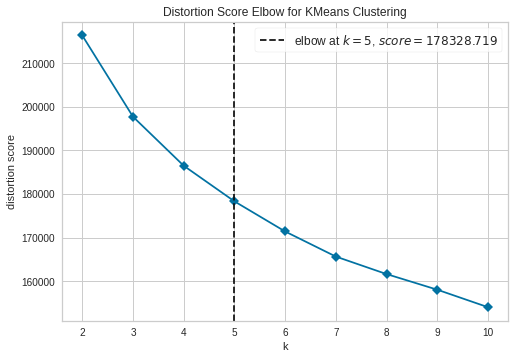

In [ ]:
plot_model(kmeans, plot = 'elbow')

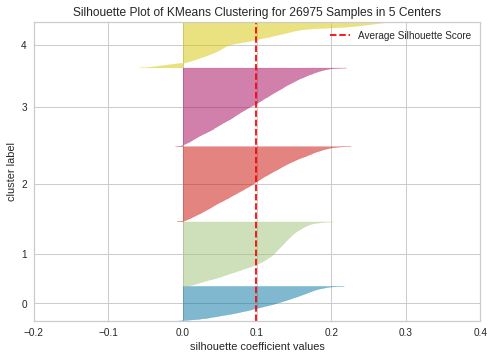

In [ ]:
plot_model(kmeans, plot = 'silhouette')

In [ ]:
plot_model(kmeans, plot = 'distribution')

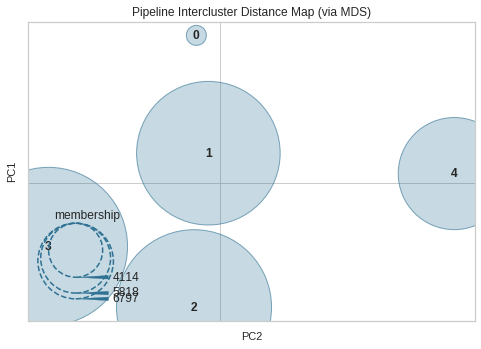

In [ ]:
plot_model(kmeans, plot = 'distance')

In [ ]:
predictions = predict_model(kmeans, data = df)
predictions.head()

genero       monto  hora  tipo_tc  linea_tc  interes_tc  status_txn  \
0      F  608.345633    20  FÃ­sica     71000          51    Aceptada   
1      F   88.719243     7  Virtual     71000          51    Aceptada   
2      F  790.037653    11  Virtual     94000          56  En proceso   
3      F  767.005387    11  FÃ­sica     94000          56    Aceptada   
4      F  254.171053    10  FÃ­sica     94000          56    Aceptada   

   is_prime       dcto   cashback  fraude  device_score        dia    Cluster  
0     False  60.834563   5.475111   False             3    Tuesday  Cluster 4  
1     False   0.000000   1.774385   False             1  Wednesday  Cluster 3  
2     False   0.000000  15.800753   False             1     Friday  Cluster 0  
3     False   0.000000   7.670054   False             3     Friday  Cluster 1  
4     False   0.000000   2.541711   False             3   Thursday  Cluster 3

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

'%matplotlib inline'


'%matplotlib inline'

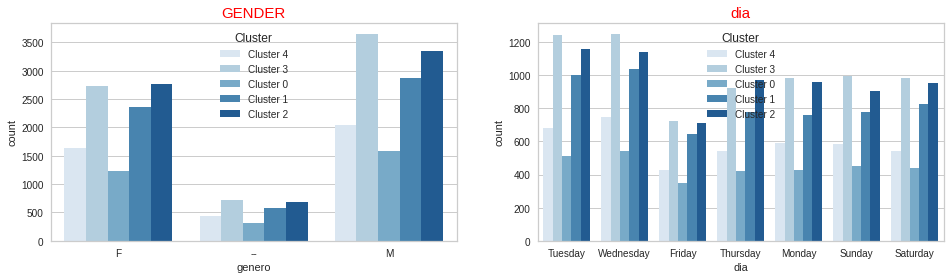

In [ ]:
plt.figure(figsize=(16,4))
plt.subplot(121)
sns.countplot(predictions["genero"],hue="Cluster",data=predictions,palette="Blues")
plt.title("GENDER",fontsize=15,color="Red")
plt.subplot(122)
sns.countplot(predictions["dia"],hue="Cluster",data=predictions,palette="Blues")
plt.title("dia",fontsize=15,color="Red")
plt.show()

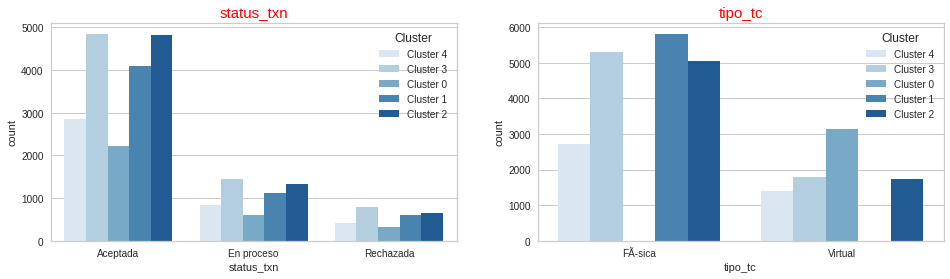

In [ ]:
plt.figure(figsize=(16,4))
plt.subplot(121)
sns.countplot(predictions["status_txn"],hue="Cluster",data=predictions,palette="Blues")
plt.title("status_txn",fontsize=15,color="Red")
plt.subplot(122)
sns.countplot(predictions["tipo_tc"],hue="Cluster",data=predictions,palette="Blues")
plt.title("tipo_tc",fontsize=15,color="Red")
plt.show()

In [ ]:
predictions['fraude'] = predictions['fraude'].astype(object)
predictions['fraude']= pd.Categorical(predictions.fraude)
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26975 entries, 0 to 26974
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   genero        26975 non-null  object  
 1   monto         26975 non-null  float64 
 2   hora          26975 non-null  int64   
 3   tipo_tc       26975 non-null  object  
 4   linea_tc      26975 non-null  int64   
 5   interes_tc    26975 non-null  int64   
 6   status_txn    26975 non-null  object  
 7   is_prime      26975 non-null  bool    
 8   dcto          26975 non-null  float64 
 9   cashback      26975 non-null  float64 
 10  fraude        26975 non-null  category
 11  device_score  26975 non-null  int64   
 12  dia           26975 non-null  object  
 13  Cluster       26975 non-null  object  
dtypes: bool(1), category(1), float64(3), int64(4), object(5)
memory usage: 2.5+ MB


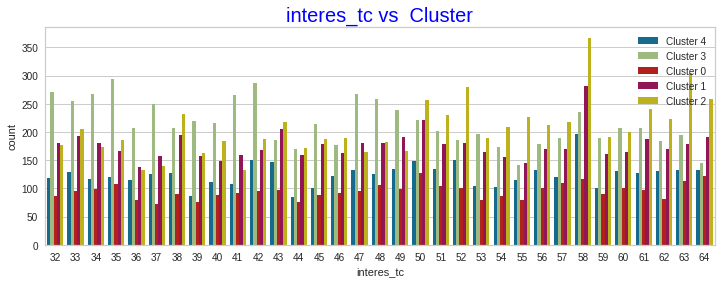

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(predictions["interes_tc"],hue="Cluster",data=predictions)
plt.title("interes_tc vs  Cluster",fontsize=20,color="BLUE")
plt.legend()
plt.show()

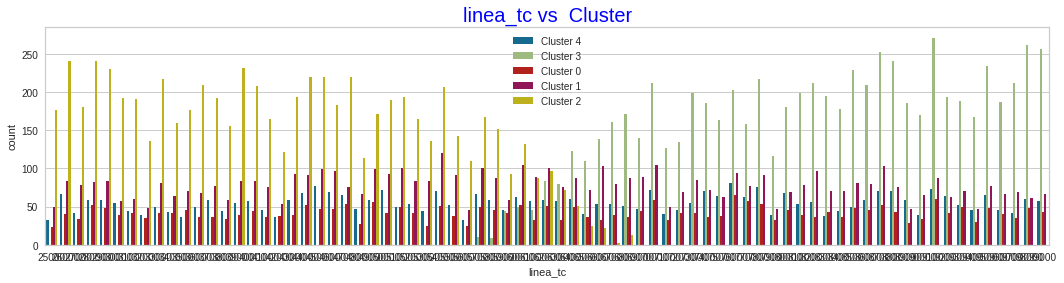

In [ ]:
plt.figure(figsize=(18,4))
sns.countplot(predictions["linea_tc"],hue="Cluster",data=predictions)
plt.title("linea_tc vs  Cluster",fontsize=20,color="BLUE")
plt.legend()
plt.show()

In [ ]:


# plt.figure(figsize=(18,4))
# sns.countplot(predictions["is_prime"],hue="Cluster",data=predictions)
# plt.title("linea_tc vs  Cluster",fontsize=20,color="BLUE")
# plt.legend()
# plt.show()

In [ ]:
# plt.figure(figsize=(18,4))
# sns.countplot(predictions["cashback"],hue="Cluster",data=predictions)
# plt.title("cashback vs  Cluster",fontsize=20,color="BLUE")
# plt.legend()
# plt.show()

In [ ]:
predictions[predictions['Cluster'] == 'Cluster 0'].describe(include='all')

genero        monto         hora  tipo_tc      linea_tc   interes_tc  \
count    3145  3145.000000  3145.000000     3145   3145.000000  3145.000000   
unique      3          NaN          NaN        1           NaN          NaN   
top         M          NaN          NaN  Virtual           NaN          NaN   
freq     1589          NaN          NaN     3145           NaN          NaN   
mean      NaN   719.877681    11.818124      NaN  62567.885533    48.495707   
std       NaN   160.558648     6.594777      NaN  21468.790269     9.567295   
min       NaN   397.802667     1.000000      NaN  25000.000000    32.000000   
25%       NaN   587.062195     6.000000      NaN  44000.000000    40.000000   
50%       NaN   721.140170    12.000000      NaN  63000.000000    49.000000   
75%       NaN   859.170115    17.000000      NaN  81000.000000    57.000000   
max       NaN   999.579117    23.000000      NaN  99000.000000    64.000000   

       status_txn is_prime    dcto     cashback fraude  device_score  \
count        3145     3145  3145.0  3145.000000   3145   3145.000000   
unique          3        2     NaN          NaN      2           NaN   
top      Aceptada    False     NaN          NaN  False           NaN   
freq         2224     2771     NaN          NaN   3049           NaN   
mean          NaN      NaN     0.0    14.397554    NaN      2.997774   
std           NaN      NaN     0.0     3.211173    NaN      1.412974   
min           NaN      NaN     0.0     7.956053    NaN      1.000000   
25%           NaN      NaN     0.0    11.741244    NaN      2.000000   
50%           NaN      NaN     0.0    14.422803    NaN      3.000000   
75%           NaN      NaN     0.0    17.183402    NaN      4.000000   
max           NaN      NaN     0.0    19.991582    NaN      5.000000   

              dia    Cluster  
count        3145       3145  
unique          7          1  
top     Wednesday  Cluster 0  
freq          542       3145  
mean          NaN        NaN  
std           NaN        NaN  
min           NaN        NaN  
25%           NaN        NaN  
50%           NaN        NaN  
75%           NaN        NaN  
max           NaN        NaN

Los usuarios agrupados corresponden a patrones de compran virtuales.

Cabar alto descuento en 0

In [ ]:
predictions[predictions['Cluster'] == 'Cluster 1'].describe(include='all')

genero        monto         hora  tipo_tc      linea_tc   interes_tc  \
count    5818  5818.000000  5818.000000     5818   5818.000000  5818.000000   
unique      3          NaN          NaN        1           NaN          NaN   
top         M          NaN          NaN  FÃ­sica           NaN          NaN   
freq     2882          NaN          NaN     5818           NaN          NaN   
mean      NaN   780.163044    11.998625      NaN  61680.990031    48.241148   
std       NaN   131.646443     6.656895      NaN  20784.013828     9.537244   
min       NaN   466.423292     1.000000      NaN  25000.000000    32.000000   
25%       NaN   674.386644     6.000000      NaN  45000.000000    40.000000   
50%       NaN   784.935127    12.000000      NaN  61000.000000    48.000000   
75%       NaN   892.825545    18.000000      NaN  79000.000000    57.000000   
max       NaN   999.835102    23.000000      NaN  99000.000000    64.000000   

       status_txn is_prime    dcto     cashback fraude  device_score  \
count        5818     5818  5818.0  5818.000000   5818   5818.000000   
unique          3        2     NaN          NaN      2           NaN   
top      Aceptada    False     NaN          NaN  False           NaN   
freq         4106     5029     NaN          NaN   5649           NaN   
mean          NaN      NaN     0.0     7.801630    NaN      2.990718   
std           NaN      NaN     0.0     1.316464    NaN      1.418795   
min           NaN      NaN     0.0     4.664233    NaN      1.000000   
25%           NaN      NaN     0.0     6.743866    NaN      2.000000   
50%           NaN      NaN     0.0     7.849351    NaN      3.000000   
75%           NaN      NaN     0.0     8.928255    NaN      4.000000   
max           NaN      NaN     0.0     9.998351    NaN      5.000000   

              dia    Cluster  
count        5818       5818  
unique          7          1  
top     Wednesday  Cluster 1  
freq         1037       5818  
mean          NaN        NaN  
std           NaN        NaN  
min           NaN        NaN  
25%           NaN        NaN  
50%           NaN        NaN  
75%           NaN        NaN  
max           NaN        NaN

Una conclusion importante de este cluster, es que ningun usuario tiene descuento y su porcentaje de cashbar es bajo.

In [ ]:
predictions[predictions['Cluster'] == 'Cluster 2'].describe(include='all')

genero        monto         hora  tipo_tc      linea_tc   interes_tc  \
count    6797  6797.000000  6797.000000     6797   6797.000000  6797.000000   
unique      3          NaN          NaN        2           NaN          NaN   
top         M          NaN          NaN  FÃ­sica           NaN          NaN   
freq     3345          NaN          NaN     5064           NaN          NaN   
mean      NaN   260.296089    12.321318      NaN  42526.702957    49.328674   
std       NaN   156.890335     6.624018      NaN  11015.161600     9.573880   
min       NaN     0.017303     1.000000      NaN  25000.000000    32.000000   
25%       NaN   127.544502     7.000000      NaN  33000.000000    41.000000   
50%       NaN   252.448547    13.000000      NaN  42000.000000    50.000000   
75%       NaN   382.894168    18.000000      NaN  51000.000000    58.000000   
max       NaN   653.321343    23.000000      NaN  68000.000000    64.000000   

       status_txn is_prime         dcto     cashback fraude  device_score  \
count        6797     6797  6797.000000  6797.000000   6797   6797.000000   
unique          3        2          NaN          NaN      2           NaN   
top      Aceptada    False          NaN          NaN  False           NaN   
freq         4811     5987          NaN          NaN   6584           NaN   
mean          NaN      NaN     7.955261     3.067721    NaN      3.015889   
std           NaN      NaN    15.242029     2.003672    NaN      1.423252   
min           NaN      NaN     0.000000     0.000138    NaN      1.000000   
25%           NaN      NaN     0.000000     1.440857    NaN      2.000000   
50%           NaN      NaN     0.000000     2.846766    NaN      3.000000   
75%           NaN      NaN     7.490837     4.403087    NaN      4.000000   
max           NaN      NaN    79.005079     9.740382    NaN      5.000000   

            dia    Cluster  
count      6797       6797  
unique        7          1  
top     Tuesday  Cluster 2  
freq       1156       6797  
mean        NaN        NaN  
std         NaN        NaN  
min         NaN        NaN  
25%         NaN        NaN  
50%         NaN        NaN  
75%         NaN        NaN  
max         NaN        NaN

In [ ]:
predictions[predictions['Cluster'] == 'Cluster 3'].describe(include='all')

genero        monto         hora  tipo_tc      linea_tc   interes_tc  \
count    7101  7101.000000  7101.000000     7101   7101.000000  7101.000000   
unique      3          NaN          NaN        2           NaN          NaN   
top         M          NaN          NaN  FÃ­sica           NaN          NaN   
freq     3655          NaN          NaN     5305           NaN          NaN   
mean      NaN   261.971283    11.826644      NaN  82013.237572    46.936488   
std       NaN   158.085231     6.666561      NaN  10931.030618     9.536500   
min       NaN     0.189750     1.000000      NaN  57000.000000    32.000000   
25%       NaN   129.098477     6.000000      NaN  73000.000000    39.000000   
50%       NaN   254.650712    12.000000      NaN  83000.000000    47.000000   
75%       NaN   386.534862    18.000000      NaN  91000.000000    55.000000   
max       NaN   672.990319    23.000000      NaN  99000.000000    64.000000   

       status_txn is_prime         dcto     cashback fraude  device_score  \
count        7101     7101  7101.000000  7101.000000   7101   7101.000000   
unique          3        2          NaN          NaN      2           NaN   
top      Aceptada    False          NaN          NaN  False           NaN   
freq         4852     6075          NaN          NaN   6890           NaN   
mean          NaN      NaN     7.922432     3.079631    NaN      3.001549   
std           NaN      NaN    15.175787     2.005867    NaN      1.412070   
min           NaN      NaN     0.000000     0.001518    NaN      1.000000   
25%           NaN      NaN     0.000000     1.444385    NaN      2.000000   
50%           NaN      NaN     0.000000     2.907989    NaN      3.000000   
75%           NaN      NaN     7.491403     4.440686    NaN      4.000000   
max           NaN      NaN    78.893786     9.693031    NaN      5.000000   

              dia    Cluster  
count        7101       7101  
unique          7          1  
top     Wednesday  Cluster 3  
freq         1251       7101  
mean          NaN        NaN  
std           NaN        NaN  
min           NaN        NaN  
25%           NaN        NaN  
50%           NaN        NaN  
75%           NaN        NaN  
max           NaN        NaN

In [ ]:
predictions[predictions['Cluster'] == 'Cluster 4'].describe(include='all')

genero        monto         hora  tipo_tc      linea_tc   interes_tc  \
count    4114  4114.000000  4114.000000     4114   4114.000000  4114.000000   
unique      3          NaN          NaN        2           NaN          NaN   
top         M          NaN          NaN  FÃ­sica           NaN          NaN   
freq     2048          NaN          NaN     2716           NaN          NaN   
mean      NaN   736.486406    11.828148      NaN  62772.484200    48.394993   
std       NaN   155.544305     6.630197      NaN  21306.129202     9.528071   
min       NaN   324.284344     1.000000      NaN  25000.000000    32.000000   
25%       NaN   614.105133     6.000000      NaN  45000.000000    40.000000   
50%       NaN   738.214816    12.000000      NaN  63000.000000    49.000000   
75%       NaN   869.207148    18.000000      NaN  81000.000000    57.000000   
max       NaN   999.917764    23.000000      NaN  99000.000000    64.000000   

       status_txn is_prime         dcto     cashback fraude  device_score  \
count        4114     4114  4114.000000  4114.000000   4114   4114.000000   
unique          3        2          NaN          NaN      2           NaN   
top      Aceptada    False          NaN          NaN  False           NaN   
freq         2851     3554          NaN          NaN   3993           NaN   
mean          NaN      NaN    87.705364     8.630416    NaN      3.002917   
std           NaN      NaN    32.303919     3.539708    NaN      1.419016   
min           NaN      NaN    41.601632     2.786826    NaN      1.000000   
25%           NaN      NaN    66.597734     6.061753    NaN      2.000000   
50%           NaN      NaN    80.801991     7.651314    NaN      3.000000   
75%           NaN      NaN    94.865727    10.273734    NaN      4.000000   
max           NaN      NaN   199.356251    17.997720    NaN      5.000000   

              dia    Cluster  
count        4114       4114  
unique          7          1  
top     Wednesday  Cluster 4  
freq          748       4114  
mean          NaN        NaN  
std           NaN        NaN  
min           NaN        NaN  
25%           NaN        NaN  
50%           NaN        NaN  
75%           NaN        NaN  
max           NaN        NaN

El desciento es de los mas altos,estos usuarios tiene un patron de comportamiento distinto, casback alto